In [1]:
import seaborn as sb
import scipy
import math
import statistics as stat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

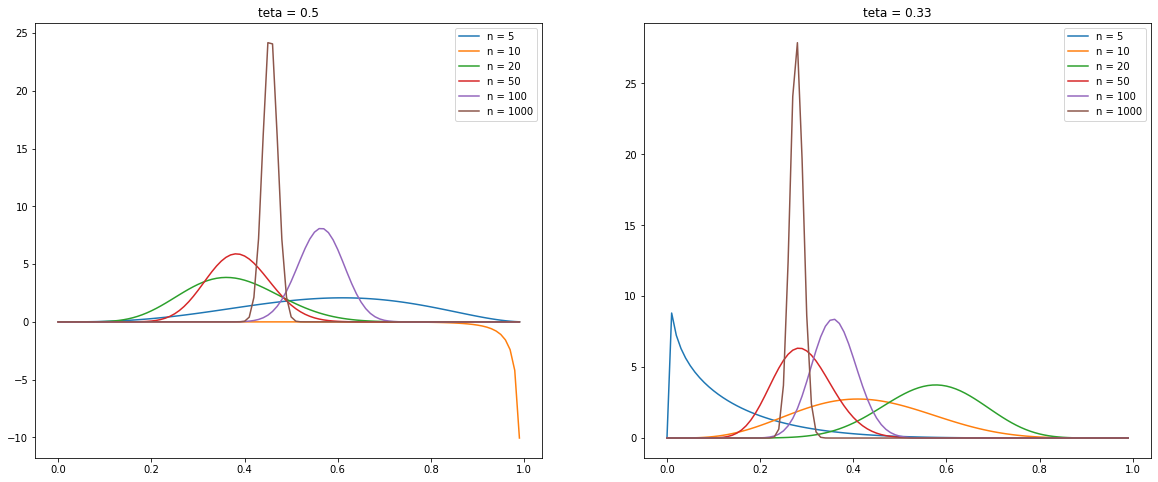

In [4]:
#10.1(a)
def f(u,sum_x,n):
    if 0 < u < 1:
        return (u**(sum_x) * (1-u)**(n-sum_x))/(scipy.special.beta(sum_x+1,n-sum_x+1))
    else:
        return 0
teta_list = [1/2, 1/3]
fig, ax = plt.subplots(1,2,figsize=(20,8))
n_list = [5,10,20,50,100,1000]
U = np.arange(0,1,0.01)
for i in range(len(teta_list)):
    for j in range(len(n_list)):
        teta = teta_list[i]
        n = n_list[j]
        x = scipy.stats.norm.rvs(teta,size=n)
        x = x.sum()
        F = np.array([f(u,x,n) for u in U])
        ax[i].plot(U,F,label='n = '+str(n))
        ax[i].set_title('teta = '+str(round(teta,2)))
        ax[i].legend()
plt.show()

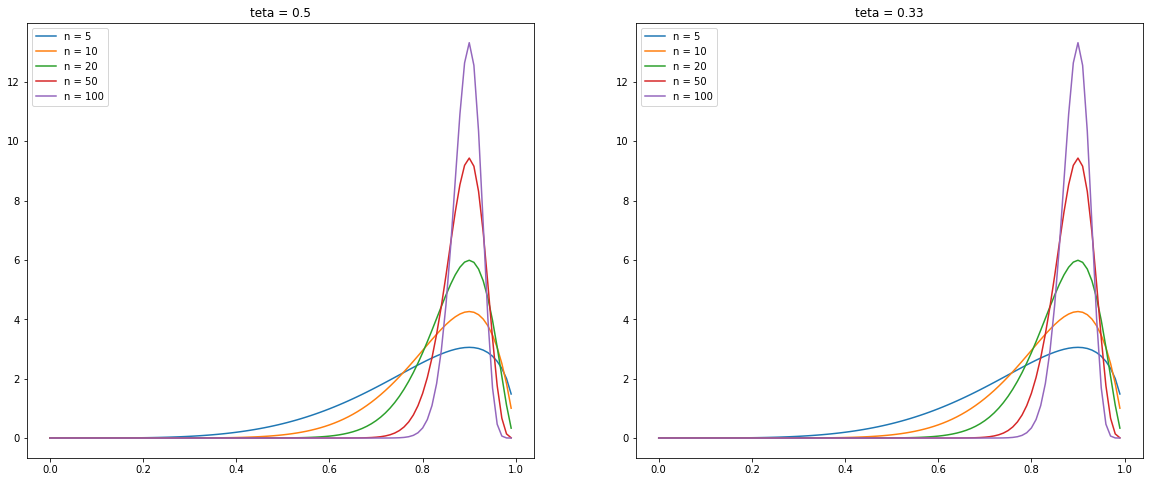

In [15]:
#10.1(b)
def f(u,sum_x,n):
    if 0 < u < 1:
        return (u**(sum_x) * (1-u)**(n-sum_x))/(scipy.special.beta(sum_x+1,n-sum_x+1))
    else:
        return 0
teta_list = [1/2, 1/3]
fig, ax = plt.subplots(1,2,figsize=(20,8))
n_list = [5,10,20,50,100]
U = np.arange(0,1,0.01)
for i in range(len(teta_list)):
    for j in range(len(n_list)):
        teta = teta_list[i]
        n = n_list[j]
        x = float(9 * n) / 10
        F = np.array([f(u,x,n) for u in U])
        ax[i].plot(U,F,label='n = '+str(n))
        ax[i].set_title('teta = '+str(round(teta,2)))
        ax[i].legend()
plt.show()

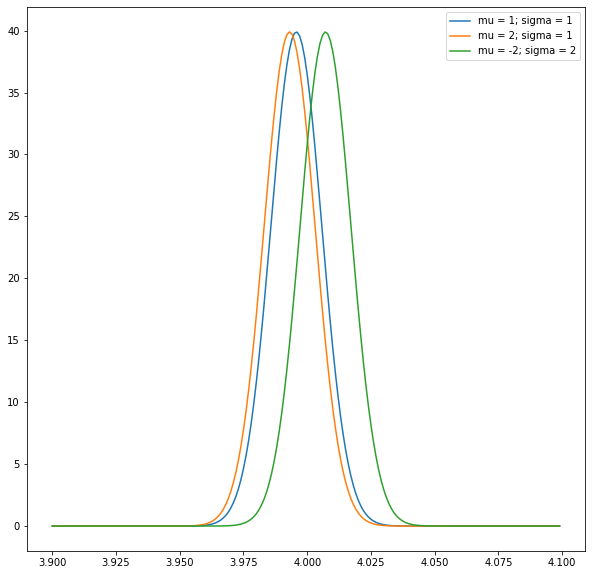

In [78]:
#10.2(a)
def f(u,sum_x,mu,sigma_1):
    loc = (float(mu)/sigma_1**2 + sum_x)/(float(1)/sigma_1**2 + n)
    scale = (float(1)/sigma_1**2 + n)**(-float(1)/2)
    return float(scipy.stats.norm.pdf(u,loc=loc,scale=scale))
n = 10000
teta1 = 4
mu_list = [1,2,-2]
sigma_list = [1,1,2]
fig, ax = plt.subplots(1,1,figsize=(10,10))
U = np.arange(teta1-0.1,teta1+0.1,0.001)
for i in range(len(mu_list)):
    mu = mu_list[i]
    sigma = sigma_list[i]
    x1 = scipy.stats.norm.rvs(loc=teta1,scale=1,size=n)
    x1 = x1.sum()
    F1 = []
    F1 = [f(u,x1,mu,sigma) for u in U]
    ax.plot(U,F1,label='mu = '+str(mu)+'; sigma = '+str(sigma))
ax.legend()
plt.show()

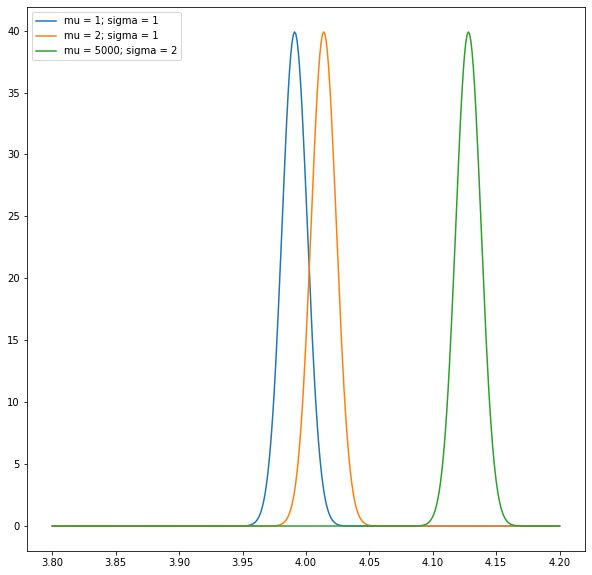

In [7]:
#10.2(b)
def f(u,sum_x,mu,sigma_1):
    loc = (float(mu)/sigma_1**2 + sum_x)/(float(1)/sigma_1**2 + n)
    scale = (float(1)/sigma_1**2 + n)**(-float(1)/2)
    return float(scipy.stats.norm.pdf(u,loc=loc,scale=scale))
n = 10000
teta1 = 4
mu_list = [1,2,5000]
sigma_list = [1,1,2]
fig, ax = plt.subplots(1,1,figsize=(10,10))
U = np.arange(teta1-0.2,teta1+0.2,0.001)
for i in range(len(mu_list)):
    mu = mu_list[i]
    sigma = sigma_list[i]
    x1 = scipy.stats.norm.rvs(loc=teta1,scale=1,size=n)
    x1 = x1.sum()
    F1 = []
    F1 = [f(u,x1,mu,sigma) for u in U]
    ax.plot(U,F1,label='mu = '+str(mu)+'; sigma = '+str(sigma))
ax.legend()
plt.show()

In [31]:
#10.2(c)
mu_list = [1,2,4]
sigma_list = [1,2,0.1]
n = 100
teta1 = 4

print('teta =',teta1)
k = 1000
for i in range(len(mu_list)):
    bayes = []
    for j in range(k):
        mu = mu_list[i]
        sigma = sigma_list[i]
        x = scipy.stats.norm.rvs(loc=teta1,scale=1,size=n)
        x = x.sum()
        bayes_est = (float(mu)/sigma**2 + x)/(float(1)/sigma**2 + n)
        bayes.append(bayes_est)
    bayes = np.array(bayes)
    print('mu =',mu_list[i],'; sigma =',sigma_list[i],'; min est =',round(bayes.min(),3),'; max est =',round(bayes.max(),3),'; mean est =',round(bayes.mean(),3),'; residual of est =',round(np.mean(np.absolute(bayes-teta1)),3))

teta = 4
mu = 1 ; sigma = 1 ; min est = 3.617 ; max est = 4.321 ; mean est = 3.973 ; residual of est = 0.082
mu = 2 ; sigma = 2 ; min est = 3.675 ; max est = 4.394 ; mean est = 3.996 ; residual of est = 0.08
mu = 4 ; sigma = 0.1 ; min est = 3.837 ; max est = 4.139 ; mean est = 4.001 ; residual of est = 0.039


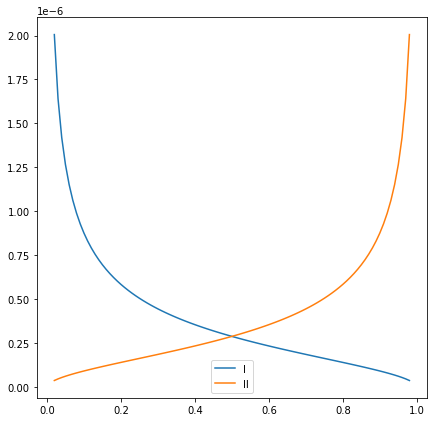

In [133]:
#10.3
n = 1000
teta0 = 0
teta1 = 1
P = np.arange(0.02,0.99,0.01)
I1 = [1-scipy.stats.norm.cdf(np.log(p/(1-p)) + n/2, loc=0, scale=np.sqrt(n)) for p in P]
I2 = [scipy.stats.norm.cdf(np.log(p/(1-p)) + n/2, loc=n, scale=np.sqrt(n)) for p in P]
fig, ax = plt.subplots(1,1,figsize=(7,7))
ax.plot(P,I1,label='I')
ax.plot(P,I2,label='II')
ax.legend()
plt.show()